Classification of Paediatric Inflammatory Bowel Disease using Machine Learning
https://www.nature.com/articles/s41598-017-02606-2.pdf

https://www.nature.com/articles/s41598-017-02606-2

https://static-content.springer.com/esm/art%3A10.1038%2Fs41598-017-02606-2/MediaObjects/41598_2017_2606_MOESM1_ESM.xls

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6382508/

https://towardsdatascience.com/decision-trees-and-random-forests-for-classification-and-regression-pt-1-dbb65a458df

In [0]:
# import necessary Python packages
import os
import numpy as np
import urllib.request


# set the working directory to the `earth-analytics-bootcamp` directory
# print the current working directory
os.getcwd()
os.chdir("/content/drive_all/My Drive/1S2019/IA006C/IBD")


In [0]:
#from numpy import loadtxt
#dataset = loadtxt('/content/drive_all/My Drive/1S2019/IA006C/IBD/TrainingDATA.csv', delimiter=",")

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm #, datasets

# Cargar el Drive helper y mount
from google.colab import drive

# Link y Codigo de autorizacion.
drive.mount('/content/drive_all')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive_all


In [0]:
MBE = pd.read_csv('https://raw.githubusercontent.com/santanche/lab2learn/master/machine-learning/zombie-health/s02weka/zombie-health-spreadsheet-ml.csv', delimiter=',')
#MBE

In [0]:
LaboratoryAnalysis = ['Endoscopy','Histology']
TRAIN_data = pd.read_csv('/content/drive_all/My Drive/1S2019/IA006C/IBD/TrainingDATA_IBD.csv', delimiter=',')
TEST_data = pd.read_csv('/content/drive_all/My Drive/1S2019/IA006C/IBD/ValidationDATA_IBD.csv',delimiter=',')
features=pd.read_csv('/content/drive_all/My Drive/1S2019/IA006C/IBD/EH_features_IBD.csv', delimiter=',')

#my_data.columns = yearmonths
#my_data.set_index('year', inplace=True)
print(features)
print(' ')
print(TRAIN_data.head())
print(' ')
print(TEST_data.head())


    Endoscopy  Histology 
0       Mouth       Mouth
1  Oesophagus  Oesophagus
2     Stomach     Stomach
3    Duodenum    Duodenum
4       Ileum       Ileum
5     A-Colon     A-Colon
6     T-Colon     T-Colon
7     D-Colon     D-Colon
8      Rectum      Rectum
9    Perianal    Perianal
 
  Training set  Mouth  Oesophagus  ...  Rectum.1  Perianal.1        Diagnosis
0          P_1     -1          -1  ...        -1           0  Crohn_s Disease
1          P_2     -1          -1  ...        -1           0  Crohn_s Disease
2          P_3     -1          -1  ...         1           0  Crohn_s Disease
3          P_4     -1          -1  ...         1           0  Crohn_s Disease
4          P_5     -1          -1  ...        -1           0  Crohn_s Disease

[5 rows x 22 columns]
 
  Validation set  Mouth  Oesophagus  ...  Rectum.1  Perianal.1        Diagnosis
0            V_1     -1          -1  ...         1           0  Crohn_s Disease
1            V_2     -1          -1  ...         1         

In [0]:
print(TRAIN_data['Diagnosis'].unique())
# inflammatory bowel disease unclassified (IBDU) 

['Crohn_s Disease' 'IBDU' 'Ulcerative Colitis']


In [0]:
feature_names = list(TRAIN_data.iloc[:,1:21])
X = TRAIN_data[feature_names]
y = TRAIN_data['Diagnosis']
print(TRAIN_data['Diagnosis'].unique())


['Crohn_s Disease' 'IBDU' 'Ulcerative Colitis']


In [0]:
#TRAIN_data['Diagnosis']
print(TRAIN_data.groupby('Diagnosis').size())

Diagnosis
Crohn_s Disease       143
IBDU                   29
Ulcerative Colitis     67
dtype: int64


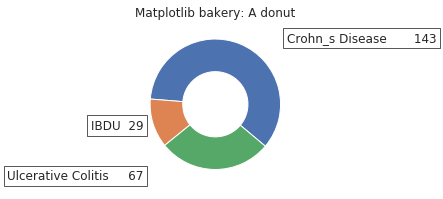

In [0]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["Crohn_s Disease       143",
          "IBDU  29",
          "Ulcerative Colitis     67"]

data = [143, 29, 67]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()


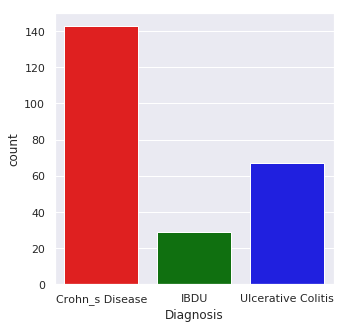

In [0]:
import seaborn as sns

colours = ["red", "green", "blue"]
sns.countplot(TRAIN_data['Diagnosis'],label="Count",palette=colours)#color="tomato"
plt.show()

In [0]:
TRAIN_data.iloc[:,1:21].head()

,Mouth,Oesophagus,Stomach,Duodenum,Ileum,A-Colon,T-Colon,D-Colon,Rectum,Perianal,Mouth.1,Oesophagus.1,Stomach.1,Duodenum.1,Ileum.1,A-Colon.1,T-Colon.1,D-Colon.1,Rectum.1,Perianal.1
0,-1,-1,-1,-1,0,-1,-1,-1,-1,1,0,1,1,-1,-1,-1,-1,-1,-1,0
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,0
2,-1,-1,-1,-1,1,1,1,1,1,1,0,1,1,-1,1,1,1,1,1,0
3,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,1,1,1,1,1,0
4,-1,-1,-1,1,1,1,-1,-1,-1,-1,0,-1,1,1,1,1,-1,-1,-1,0


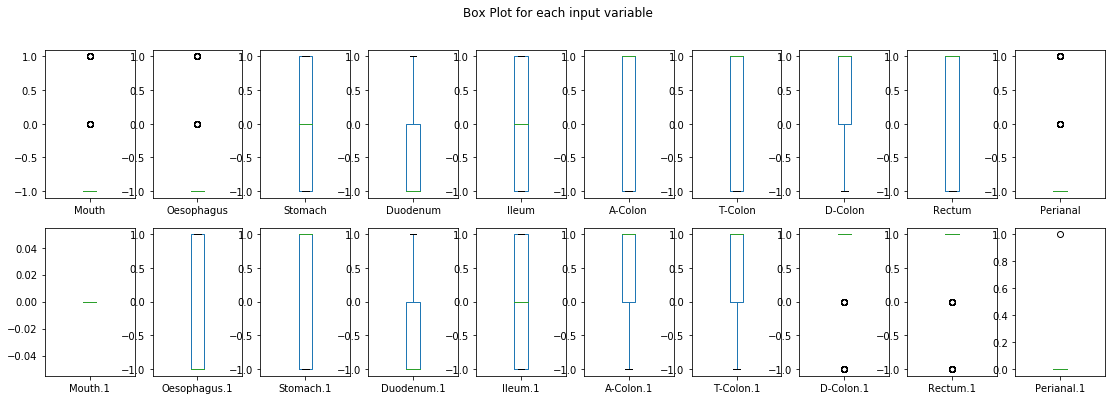

In [0]:
TRAIN_data.drop('Diagnosis', axis=1).plot(kind='box', subplots=True, layout=(2,10), sharex=False, sharey=False, figsize=(19,6), 
                                        title='Box Plot for each input variable')
plt.savefig('InflammatoryBowelDisease')
plt.show()

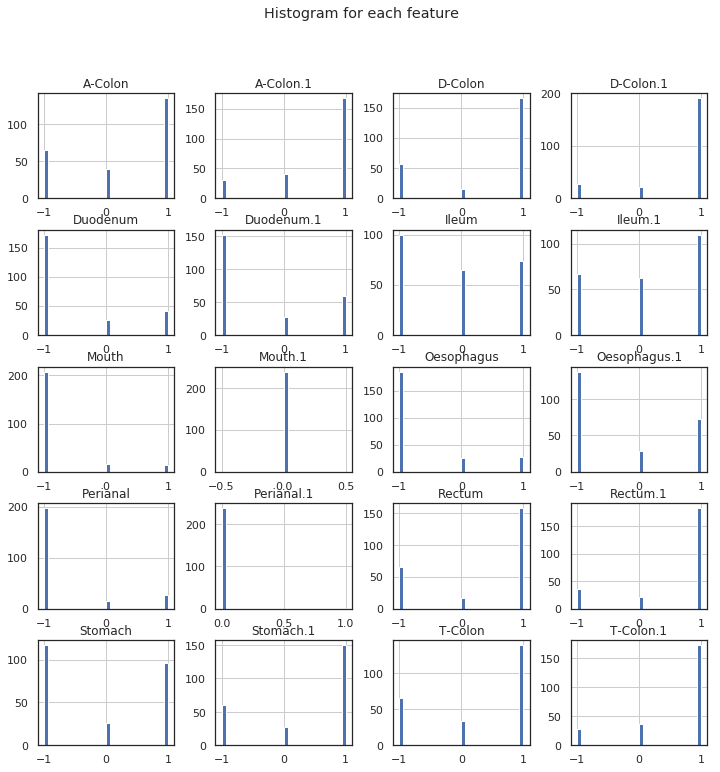

In [0]:
import pylab as pl
TRAIN_data.drop('Diagnosis' ,axis=1).hist(bins=30, figsize=(12,12))
pl.suptitle("Histogram for each feature")
plt.savefig('InflammatoryBowelDisease')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/pl

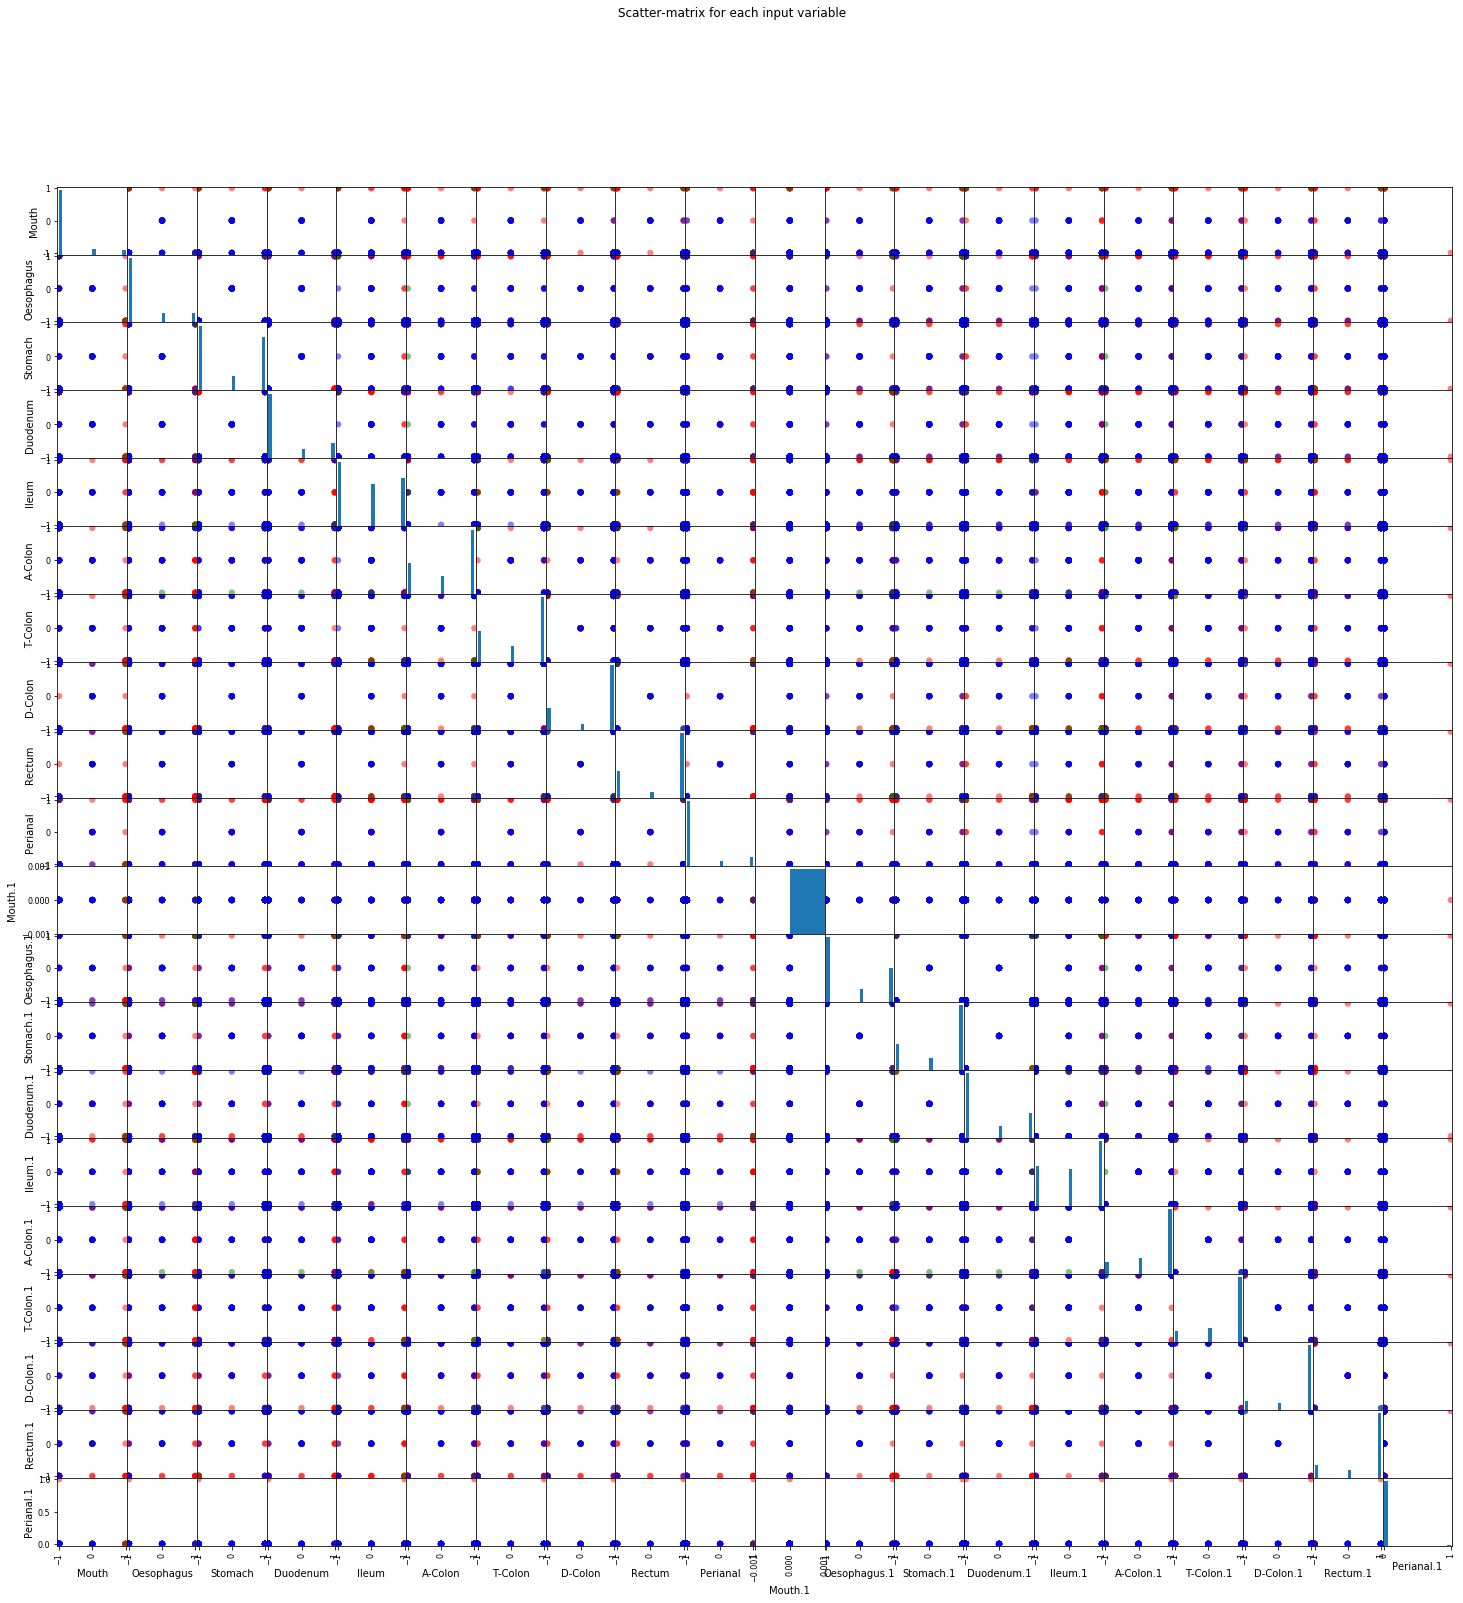

In [0]:
from pandas.plotting import scatter_matrix

#from pandas.tools.plotting import scatter_matrix
#from pandas.plotting import scatter_matrix
from pandas.plotting import scatter_matrix


from matplotlib import cm
feature_names = list(TRAIN_data.iloc[:,1:21])
X = TRAIN_data[feature_names]
y = TRAIN_data['Diagnosis']

#colours = ["blue", "red", "gold","green"]
cc=pd.DataFrame({'Crohn_s Disease':["r"], 'IBDU': ["g"], 'Ulcerative Colitis': ["b"]})
ycc= [cc[t] for t in y]
yc=np.matrix(ycc).flatten()
yc=list(yc.A1)


cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = yc, marker = 'o', s=40, hist_kwds={'bins':20}, figsize=(25,25), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [0]:
TRAIN_data.shape, TEST_data.shape


((239, 22), (48, 22))

In [0]:
X = TRAIN_data.iloc[:,1:21].values
DATA= TRAIN_data.iloc[:,1:21]
yn = TRAIN_data.iloc[:,21]
#features=list(X.columns.values)
#features=list(X)
#features

X_test=TEST_data.iloc[:,1:21].values
yn_test = TRAIN_data.iloc[:,21]

#X.shape
#X.describe()
#X.head()


nn=pd.DataFrame({'Crohn_s Disease':[0], 'IBDU': [1], 'Ulcerative Colitis': [2]})
ynn= [nn[t] for t in y]
yn=np.matrix(ynn).flatten()
yn=list(yn.A1)


#y=np.array([0 if n=='Ulcerative Colitis' else 1  for n in yn])
#y_test=np.array([0 if n=='Ulcerative Colitis' else 1  for n in yn_test])


In [0]:
TRAIN_data.head()

,Training set,Mouth,Oesophagus,Stomach,Duodenum,Ileum,A-Colon,T-Colon,D-Colon,Rectum,Perianal,Mouth.1,Oesophagus.1,Stomach.1,Duodenum.1,Ileum.1,A-Colon.1,T-Colon.1,D-Colon.1,Rectum.1,Perianal.1,Diagnosis
0,P_1,-1,-1,-1,-1,0,-1,-1,-1,-1,1,0,1,1,-1,-1,-1,-1,-1,-1,0,Crohn_s Disease
1,P_2,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,0,Crohn_s Disease
2,P_3,-1,-1,-1,-1,1,1,1,1,1,1,0,1,1,-1,1,1,1,1,1,0,Crohn_s Disease
3,P_4,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,1,1,1,1,1,0,Crohn_s Disease
4,P_5,-1,-1,-1,1,1,1,-1,-1,-1,-1,0,-1,1,1,1,1,-1,-1,-1,0,Crohn_s Disease


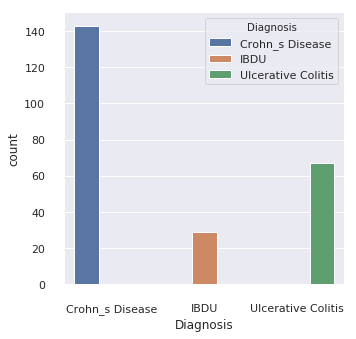

In [0]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(5,5)})
# create a countplot
sns.countplot('Diagnosis',data=TRAIN_data,hue = 'Diagnosis')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plotplt.show()

In [0]:
np.unique(yn)

array([1, 2, 3])

# PCA

https://plot.ly/ipython-notebooks/principal-component-analysis/


https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb

https://www.idtools.com.au/classification-nir-spectra-principal-component-analysis-python/

https://www.python-course.eu/principal_component_analysis.php

https://plot.ly/ipython-notebooks/principal-component-analysis/

https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html




In [0]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(DATA)
x

array([[-0.3623616 , -0.50603788, -0.970414  , ..., -2.53835921,
        -2.2270085 , -0.06482037],
       [-0.3623616 , -0.50603788, -0.970414  , ..., -2.53835921,
        -2.2270085 , -0.06482037],
       [-0.3623616 , -0.50603788, -0.970414  , ...,  0.47239936,
         0.5236635 , -0.06482037],
       ...,
       [-0.3623616 , -0.50603788, -0.970414  , ...,  0.47239936,
         0.5236635 , -0.06482037],
       [-0.3623616 , -0.50603788,  1.15737449, ...,  0.47239936,
         0.5236635 , -0.06482037],
       [-0.3623616 , -0.50603788,  1.15737449, ...,  0.47239936,
         0.5236635 , -0.06482037]])

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

#finalDf = pd.concat([principalDf, DATA[['target']]], axis = 1)  #
finalDf = pd.concat([principalDf, TRAIN_data[['Diagnosis']]], axis = 1)

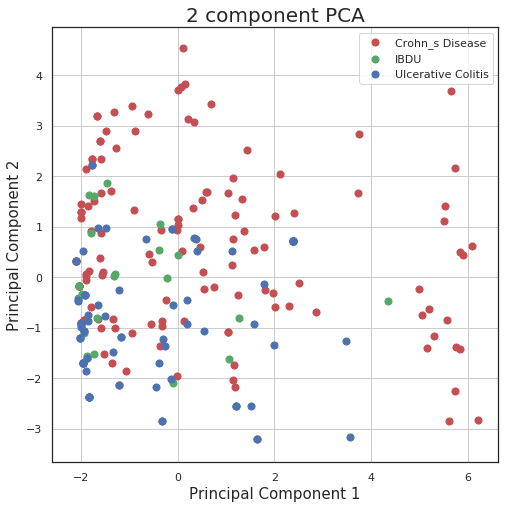

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
Diagnosis = ['Crohn_s Disease', 'IBDU', 'Ulcerative Colitis']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [0]:
DATA.head()

,Mouth,Oesophagus,Stomach,Duodenum,Ileum,A-Colon,T-Colon,D-Colon,Rectum,Perianal,Mouth.1,Oesophagus.1,Stomach.1,Duodenum.1,Ileum.1,A-Colon.1,T-Colon.1,D-Colon.1,Rectum.1,Perianal.1
0,-1,-1,-1,-1,0,-1,-1,-1,-1,1,0,1,1,-1,-1,-1,-1,-1,-1,0
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,0
2,-1,-1,-1,-1,1,1,1,1,1,1,0,1,1,-1,1,1,1,1,1,0
3,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,1,1,1,1,1,0
4,-1,-1,-1,1,1,1,-1,-1,-1,-1,0,-1,1,1,1,1,-1,-1,-1,0


In [0]:
nn=pd.DataFrame({'Crohn_s Disease':[0], 'IBDU': [1], 'Ulcerative Colitis': [2]})
ynn= [nn[t] for t in TRAIN_data['Diagnosis']]
yn=np.matrix(ynn).flatten()
yn=list(yn.A1)
#yn

In [0]:

feature_names = list(TRAIN_data.iloc[:,0:22])
DF = TRAIN_data[feature_names]
#DF = DF.set_index('Diagnosis')
DF = DF.set_index('Training set') 

DF.head()

,Mouth,Oesophagus,Stomach,Duodenum,Ileum,A-Colon,T-Colon,D-Colon,Rectum,Perianal,Mouth.1,Oesophagus.1,Stomach.1,Duodenum.1,Ileum.1,A-Colon.1,T-Colon.1,D-Colon.1,Rectum.1,Perianal.1,Diagnosis
Training set,,,,,,,,,,,,,,,,,,,,,
P_1,-1,-1,-1,-1,0,-1,-1,-1,-1,1,0,1,1,-1,-1,-1,-1,-1,-1,0,Crohn_s Disease
P_2,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,0,Crohn_s Disease
P_3,-1,-1,-1,-1,1,1,1,1,1,1,0,1,1,-1,1,1,1,1,1,0,Crohn_s Disease
P_4,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,1,1,1,1,1,0,Crohn_s Disease
P_5,-1,-1,-1,1,1,1,-1,-1,-1,-1,0,-1,1,1,1,1,-1,-1,-1,0,Crohn_s Disease


In [0]:
feature_names2=['Training set','Diagnosis',
 'Mouth',
 'Oesophagus',
 'Stomach',
 'Duodenum',
 'Ileum',
 'A-Colon',
 'T-Colon',
 'D-Colon',
 'Rectum',
 'Perianal',
 'Mouth.1',
 'Oesophagus.1',
 'Stomach.1',
 'Duodenum.1',
 'Ileum.1',
 'A-Colon.1',
 'T-Colon.1',
 'D-Colon.1',
 'Rectum.1',
 'Perianal.1']

In [0]:
feature_names3=['Diagnosis',
 'Mouth',
 'Oesophagus',
 'Stomach',
 'Duodenum',
 'Ileum',
 'A-Colon',
 'T-Colon',
 'D-Colon',
 'Rectum',
 'Perianal',
  'Oesophagus.1',
 'Stomach.1',
 'Duodenum.1',
 'Ileum.1',
 'A-Colon.1',
 'T-Colon.1',
 'D-Colon.1',
 'Rectum.1',
 'Perianal.1']

In [0]:
DF = TRAIN_data[feature_names2]
#DF = DF.set_index('Diagnosis')
DF = DF.set_index('Training set') 

DF.head()

,Diagnosis,Mouth,Oesophagus,Stomach,Duodenum,Ileum,A-Colon,T-Colon,D-Colon,Rectum,Perianal,Mouth.1,Oesophagus.1,Stomach.1,Duodenum.1,Ileum.1,A-Colon.1,T-Colon.1,D-Colon.1,Rectum.1,Perianal.1
Training set,,,,,,,,,,,,,,,,,,,,,
P_1,Crohn_s Disease,-1,-1,-1,-1,0,-1,-1,-1,-1,1,0,1,1,-1,-1,-1,-1,-1,-1,0
P_2,Crohn_s Disease,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,0
P_3,Crohn_s Disease,-1,-1,-1,-1,1,1,1,1,1,1,0,1,1,-1,1,1,1,1,1,0
P_4,Crohn_s Disease,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,1,1,1,1,1,0
P_5,Crohn_s Disease,-1,-1,-1,1,1,1,-1,-1,-1,-1,0,-1,1,1,1,1,-1,-1,-1,0


In [0]:
yn

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [0]:
DF.Diagnosis=yn

In [0]:
yn

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [0]:
DF.head()

,Diagnosis,Mouth,Oesophagus,Stomach,Duodenum,Ileum,A-Colon,T-Colon,D-Colon,Rectum,Perianal,Mouth.1,Oesophagus.1,Stomach.1,Duodenum.1,Ileum.1,A-Colon.1,T-Colon.1,D-Colon.1,Rectum.1,Perianal.1
Training set,,,,,,,,,,,,,,,,,,,,,
P_1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,1,0,1,1,-1,-1,-1,-1,-1,-1,0
P_2,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,0
P_3,0,-1,-1,-1,-1,1,1,1,1,1,1,0,1,1,-1,1,1,1,1,1,0
P_4,0,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,1,1,1,1,1,0
P_5,0,-1,-1,-1,1,1,1,-1,-1,-1,-1,0,-1,1,1,1,1,-1,-1,-1,0


In [0]:
dyc=DF

dyc.Diagnosis=np.array(yc)
dyc=dyc.Diagnosis
dyc

Training set
P_1      r
P_2      r
P_3      r
P_4      r
P_5      r
P_6      r
P_7      r
P_8      r
P_9      r
P_10     r
P_11     r
P_12     r
P_13     r
P_14     r
P_15     r
P_16     r
P_17     r
P_18     r
P_19     r
P_20     r
P_21     r
P_22     r
P_23     r
P_24     r
P_25     r
P_26     r
P_27     r
P_28     r
P_29     r
P_30     r
        ..
P_210    b
P_211    b
P_212    b
P_213    b
P_214    b
P_215    b
P_216    b
P_217    b
P_218    b
P_219    b
P_220    b
P_221    b
P_222    b
P_223    b
P_224    b
P_225    b
P_226    b
P_227    b
P_228    b
P_229    b
P_230    b
P_231    b
P_232    b
P_233    b
P_234    b
P_235    b
P_236    b
P_237    b
P_238    b
P_239    b
Name: Diagnosis, Length: 239, dtype: object

Index(['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10',
       ...
       'P_230', 'P_231', 'P_232', 'P_233', 'P_234', 'P_235', 'P_236', 'P_237',
       'P_238', 'P_239'],
      dtype='object', name='Training set', length=239)

In [0]:
#dyc=pd.DataFrame(yc,index=DF.index)

#DF.Diagnosis.map(dy)
dyc

Training set
P_1      r
P_2      r
P_3      r
P_4      r
P_5      r
P_6      r
P_7      r
P_8      r
P_9      r
P_10     r
P_11     r
P_12     r
P_13     r
P_14     r
P_15     r
P_16     r
P_17     r
P_18     r
P_19     r
P_20     r
P_21     r
P_22     r
P_23     r
P_24     r
P_25     r
P_26     r
P_27     r
P_28     r
P_29     r
P_30     r
        ..
P_210    b
P_211    b
P_212    b
P_213    b
P_214    b
P_215    b
P_216    b
P_217    b
P_218    b
P_219    b
P_220    b
P_221    b
P_222    b
P_223    b
P_224    b
P_225    b
P_226    b
P_227    b
P_228    b
P_229    b
P_230    b
P_231    b
P_232    b
P_233    b
P_234    b
P_235    b
P_236    b
P_237    b
P_238    b
P_239    b
Name: Diagnosis, Length: 239, dtype: object

In [0]:
DF.head()

,Diagnosis,Mouth,Oesophagus,Stomach,Duodenum,Ileum,A-Colon,T-Colon,D-Colon,Rectum,Perianal,Mouth.1,Oesophagus.1,Stomach.1,Duodenum.1,Ileum.1,A-Colon.1,T-Colon.1,D-Colon.1,Rectum.1,Perianal.1
Training set,,,,,,,,,,,,,,,,,,,,,
P_1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,1,0,1,1,-1,-1,-1,-1,-1,-1,0
P_2,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,0
P_3,0,-1,-1,-1,-1,1,1,1,1,1,1,0,1,1,-1,1,1,1,1,1,0
P_4,0,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,1,1,1,1,1,0
P_5,0,-1,-1,-1,1,1,1,-1,-1,-1,-1,0,-1,1,1,1,1,-1,-1,-1,0


In [0]:
DF.head()

,Diagnosis,Mouth,Oesophagus,Stomach,Duodenum,Ileum,A-Colon,T-Colon,D-Colon,Rectum,Perianal,Mouth.1,Oesophagus.1,Stomach.1,Duodenum.1,Ileum.1,A-Colon.1,T-Colon.1,D-Colon.1,Rectum.1,Perianal.1
Training set,,,,,,,,,,,,,,,,,,,,,
P_1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,1,0,1,1,-1,-1,-1,-1,-1,-1,0
P_2,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,0
P_3,0,-1,-1,-1,-1,1,1,1,1,1,1,0,1,1,-1,1,1,1,1,1,0
P_4,0,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,1,1,1,1,1,0
P_5,0,-1,-1,-1,1,1,1,-1,-1,-1,-1,0,-1,1,1,1,1,-1,-1,-1,0


In [0]:
DF.Diagnosis=DF.Diagnosis+1
DF.head()

,Diagnosis,Mouth,Oesophagus,Stomach,Duodenum,Ileum,A-Colon,T-Colon,D-Colon,Rectum,Perianal,Mouth.1,Oesophagus.1,Stomach.1,Duodenum.1,Ileum.1,A-Colon.1,T-Colon.1,D-Colon.1,Rectum.1,Perianal.1
Training set,,,,,,,,,,,,,,,,,,,,,
P_1,1,-1,-1,-1,-1,0,-1,-1,-1,-1,1,0,1,1,-1,-1,-1,-1,-1,-1,0
P_2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,0
P_3,1,-1,-1,-1,-1,1,1,1,1,1,1,0,1,1,-1,1,1,1,1,1,0
P_4,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,1,1,1,1,1,0
P_5,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,0,-1,1,1,1,1,-1,-1,-1,0


In [0]:
DF2 = DF[feature_names3]
DF2.head()

,Diagnosis,Mouth,Oesophagus,Stomach,Duodenum,Ileum,A-Colon,T-Colon,D-Colon,Rectum,Perianal,Oesophagus.1,Stomach.1,Duodenum.1,Ileum.1,A-Colon.1,T-Colon.1,D-Colon.1,Rectum.1,Perianal.1
Training set,,,,,,,,,,,,,,,,,,,,
P_1,1,-1,-1,-1,-1,0,-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1,0
P_2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,0
P_3,1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,0
P_4,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,0
P_5,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,0


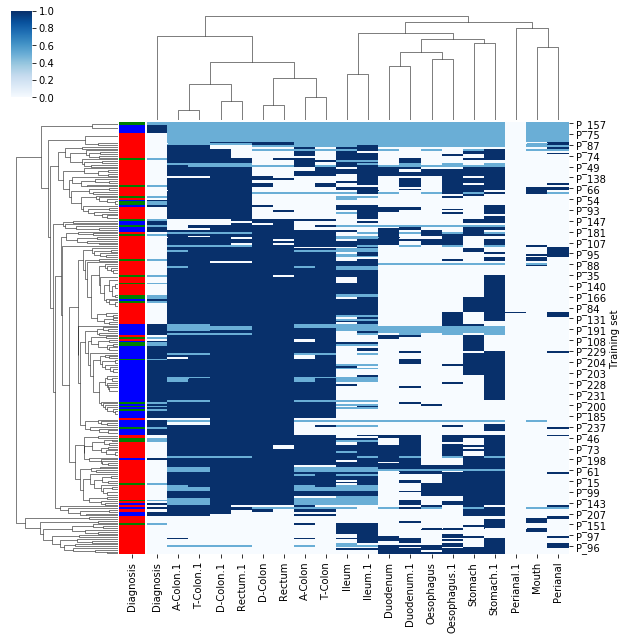

In [0]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set



 
# Prepare a vector of color mapped to the 'cyl' column
my_palette = dict(zip([1,2,3], ["red","green","blue"]))
row_colors = dyc#DF.Diagnosis.map(my_palette)
 
# plot
sns.clustermap(DF2, metric="correlation", method="average", cmap="Blues", standard_scale=1, row_colors=row_colors)


In [0]:
my_palette

{4: 'yellow', 6: 'orange', 8: 'brown'}

In [0]:
row_colors

model
Mazda RX4              orange
Mazda RX4 Wag          orange
Datsun 710             yellow
Hornet 4 Drive         orange
Hornet Sportabout       brown
Valiant                orange
Duster 360              brown
Merc 240D              yellow
Merc 230               yellow
Merc 280               orange
Merc 280C              orange
Merc 450SE              brown
Merc 450SL              brown
Merc 450SLC             brown
Cadillac Fleetwood      brown
Lincoln Continental     brown
Chrysler Imperial       brown
Fiat 128               yellow
Honda Civic            yellow
Toyota Corolla         yellow
Toyota Corona          yellow
Dodge Challenger        brown
AMC Javelin             brown
Camaro Z28              brown
Pontiac Firebird        brown
Fiat X1-9              yellow
Porsche 914-2          yellow
Lotus Europa           yellow
Ford Pantera L          brown
Ferrari Dino           orange
Maserati Bora           brown
Volvo 142E             yellow
Name: cyl, dtype: object

In [0]:
df.am=df.am-0.5
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,0.5,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,0.5,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,0.5,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,-0.5,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,-0.5,3,2


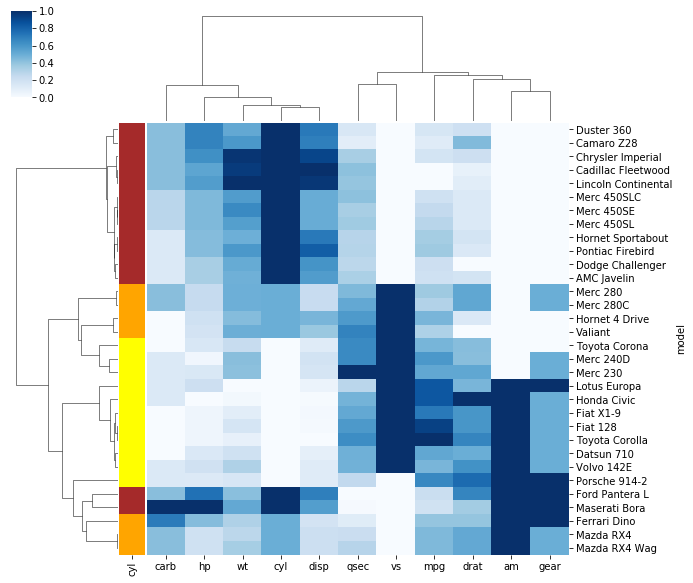

In [0]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
df
 
# Prepare a vector of color mapped to the 'cyl' column
my_palette = dict(zip(df.cyl.unique(), ["orange","yellow","brown"]))
row_colors = df.cyl.map(my_palette)
 
# plot
sns.clustermap(df, metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=row_colors)


ValueError: ignored

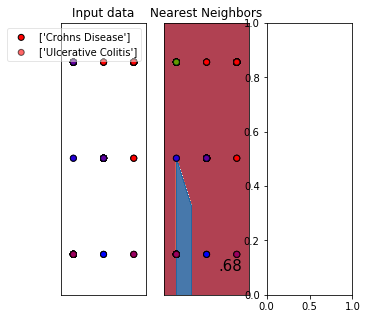

In [0]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

#X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,                    random_state=1, n_clusters_per_class=1)
pair=[5,15]
X=TRAIN_data.iloc[:,pair].values
y = np.array(yn)#

rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape[0])
linearly_separable = (X, y)




figure = plt.figure(figsize=(20,5))
i = 1
# iterate over datasets

# preprocess dataset, split into training and test part
#X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000','#00FF00', '#0000FF'])
color=['red','blue']
c_train=['red' if nn==0 else 'blue' for nn in y_train]
c_test=['red' if nn==0 else 'blue' for nn in y_test]

ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=c_train, cmap=cm_bright, edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=c_test, cmap=cm_bright, alpha=0.6,label=['Crohns Disease', 'Ulcerative Colitis'], edgecolors='k')

handles, labels = ax.get_legend_handles_labels()
ax.legend([['Crohns Disease'], ['Ulcerative Colitis']], framealpha=0.5, scatterpoints=1)


###plt.scatter(X[idx, 0], X[idx, 1], c=color, label=['Crohns Disease', 'Ulcerative Colitis'], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)####### if ds_cnt==0 :
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

3D scrateplot


https://python-graph-gallery.com/372-3d-pca-result/


https://www.idtools.com.au/classification-nir-spectra-principal-component-analysis-python/


https://www.python-course.eu/principal_component_analysis.php

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html



In [0]:
X = TRAIN_data.iloc[:,1:21].values
DATA= TRAIN_data.iloc[:,1:21]
yn = TRAIN_data.iloc[:,21]


nn=pd.DataFrame({'Crohn_s Disease':[0], 'IBDU': [1], 'Ulcerative Colitis': [2]})
ynn= [nn[t] for t in TRAIN_data['Diagnosis']]
yn=np.matrix(ynn).flatten()
yn=list(yn.A1)


In [0]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = TRAIN_data.iloc[:,1:21].values
#X = iris.data
y = np.array(yn)#
#y=iris.target

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
cc=pd.DataFrame({'Crohn_s Disease':["r"], 'IBDU': ["g"], 'Ulcerative Colitis': ["b"]})
ycc= [cc[t] for t in TRAIN_data['Diagnosis']]
yc=np.matrix(ycc).flatten()
yc=list(yc.A1)
#yc

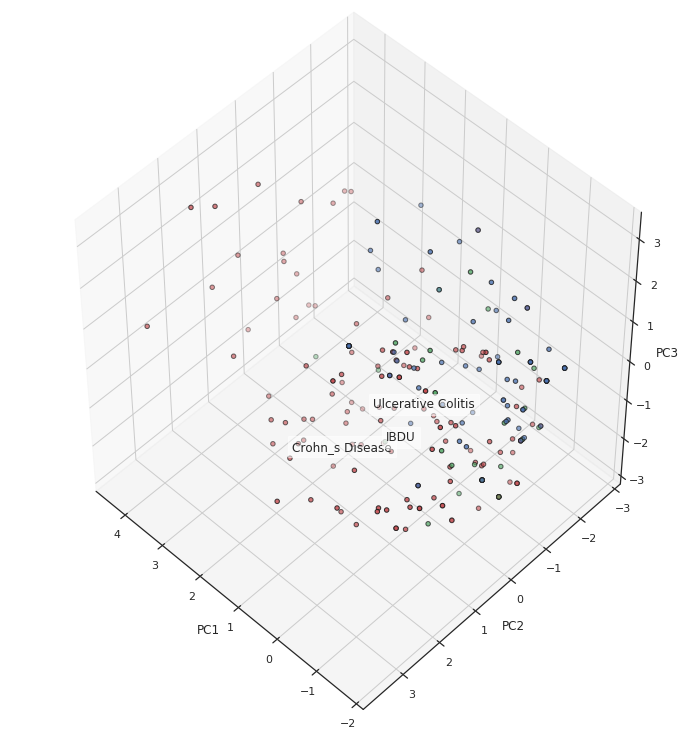

In [0]:
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Crohn_s Disease', 0), ('IBDU', 1), ('Ulcerative Colitis', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=yc, cmap=plt.cm.nipy_spectral,edgecolor='k')

#ax.w_xaxis.set_ticklabels(['PCA1'])
#ax.w_yaxis.set_ticklabels(['PCA2'])
#ax.w_zaxis.set_ticklabels(['PCA3'])

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()

No handles with labels found to put in legend.


<Figure size 480x480 with 0 Axes>

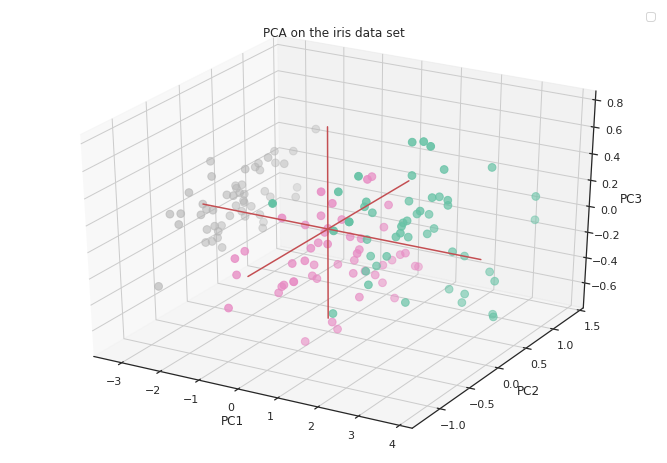

In [0]:
# libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d

 
# Get the iris dataset
import seaborn as sns
sns.set_style("white")
df = sns.load_dataset('iris')
 
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# Keep the 'specie' column appart + make it numeric for coloring
df['species']=pd.Categorical(df['species'])
my_color=df['species'].cat.codes
df = df.drop('species', 1)
 
# Run The PCA
pca = PCA(n_components=3)
pca.fit(df)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
ax.legend()

#plt.show()


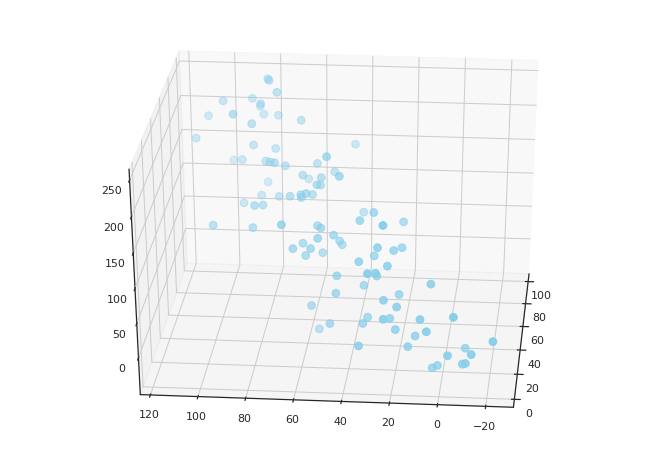

In [0]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Dataset
df=pd.DataFrame({'X': range(1,101), 'Y': np.random.randn(100)*15+range(1,101), 'Z': (np.random.randn(100)*15+range(1,101))*2 })
 
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c='skyblue', s=60)
ax.view_init(30, 185)
plt.show()


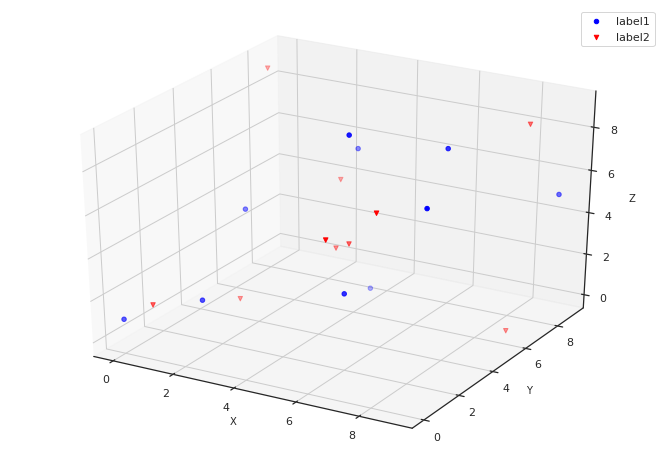

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import csv
from os import listdir
from os.path import isfile, join

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

handles = []
colors = ['blue', 'red']

X1 = np.array(range(0,10))
Y1 = np.array(range(0,10))
Z1 = np.array(range(0,10))

random.shuffle(X1)
random.shuffle(Y1)
random.shuffle(Z1)

scatter1 = ax.scatter(X1, Y1, Z1, c = colors[0], marker = 'o')

random.shuffle(X1)
random.shuffle(Y1)
random.shuffle(Z1)

scatter2 = ax.scatter(X1, Y1, Z1, c = colors[1], marker = 'v')

ax.set_xlabel('X', fontsize = 10)
ax.set_ylabel('Y', fontsize = 10)
ax.set_zlabel('Z', fontsize = 10)

ax.legend([scatter1, scatter2], ['label1', 'label2'])

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.


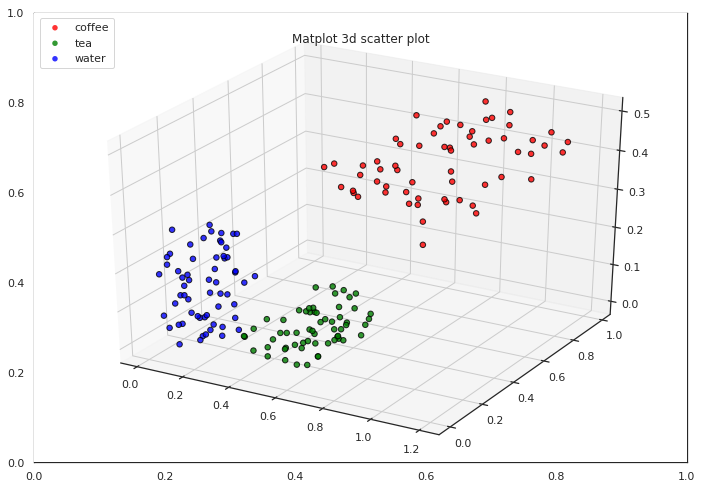

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Create data
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N),0.4+0.1*np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N),0.1*np.random.rand(N))
g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N),0.3*np.random.rand(N))

data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("coffee", "tea", "water") 

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
ax = fig.gca(projection='3d')

for data, color, group in zip(data, colors, groups):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Matplot 3d scatter plot')
plt.legend(loc=2)
plt.show()

ESTADISTICA

https://www.dataquest.io/blog/sci-kit-learn-tutorial/

https://towardsdatascience.com/breast-cancer-classification-using-support-vector-machine-svm-a510907d4878


https://www.kaggle.com/rcfreitas/python-ml-breast-cancer-diagnostic-data-set

In [0]:
import seaborn as sns


f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(DATA.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

https://www.kaggle.com/mfirat/red-wine-quality-classification-with-kernel-svm


https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine



https://www.dataquest.io/blog/sci-kit-learn-tutorial/

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [0]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)  
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  


[0.26638456 0.15574222]
[26.8430448  20.52487086]


In [0]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)                 
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,  svd_solver='full', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [0]:
X,y

(array([[-1, -1, -1, ..., -1, -1,  0],
        [-1, -1, -1, ..., -1, -1,  0],
        [-1, -1, -1, ...,  1,  1,  0],
        ...,
        [-1, -1, -1, ...,  1,  1,  0],
        [-1, -1,  1, ...,  1,  1,  0],
        [-1, -1,  1, ...,  1,  1,  0]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 

In [0]:
#yy=yy.astype(int)
 

In [0]:
from sklearn.model_selection import train_test_split




In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np


# Initializing Classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = SVC()



http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


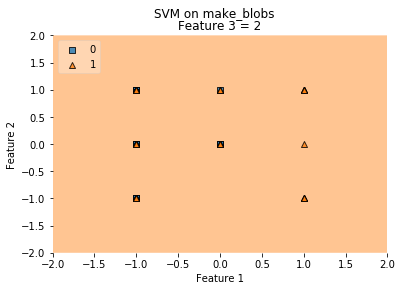

In [0]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
#X, y = datasets.make_blobs(n_samples=600, n_features=3,                          centers=[[2, 2, -2],[-2, -2, 2]],                           cluster_std=[2, 2], random_state=2)
XX=X
# Training a classifier
svm = SVC(gamma='auto')
svm.fit(XX, y)

# Plotting decision regions
fig, ax = plt.subplots()
# Decision region for feature 3 = 1.5
value = 2
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 1
plot_decision_regions(XX, y, clf=svm,filler_feature_values={2: value},filler_feature_ranges={2: width},legend=2, ax=ax)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
fig.suptitle('SVM on make_blobs')
plt.show()

In [0]:
y_test=np.array(y_test)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


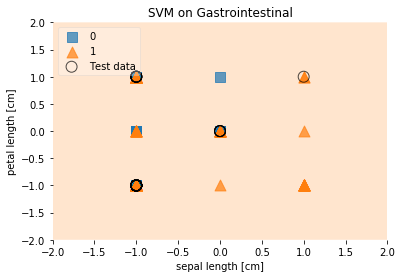

In [0]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
#iris = datasets.load_iris()
#X = iris.data[:, [0, 2]]
#y = iris.target
#X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=3)
X_train, y_train = X[:,[0,13]],y #   X[:100], y[:100]
#   X_test, y_test = X[100:], y[100:]

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
#svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10)

svm.fit(X_train, y_train)

# Specify keyword arguments to be passed to underlying plotting functions
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}
# Plotting decision regions
plot_decision_regions(X[:,[0,13]], y, clf=svm, legend=2,
                      X_highlight=X_test[:,[0,13]],
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)


#DATAGL.columns[0]='class_of_lesion'
#DATAGL.columns[1]='type_of_light'
# Adding axes annotations


plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Gastrointestinal')
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, 
          ['hyperplasic', 'serrated', 'adenoma'], 
           framealpha=0.3, scatterpoints=1)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


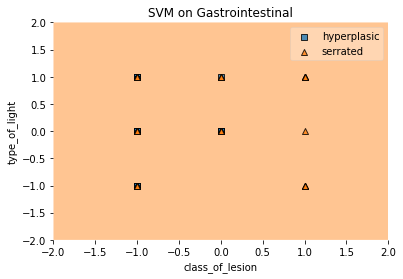

In [0]:
# Training a classifier
svm = SVC(C=0.2, kernel='linear')
# Create a SVC classifier using an RBF kernel
#svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
#svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1000)
XX=X[:,[0,15]]
svm.fit(XX, y)


# Plotting decision regions
ax = plot_decision_regions(XX, y, clf=svm, legend=0)

# Adding axes annotations
plt.xlabel('class_of_lesion')
plt.ylabel('type_of_light')
plt.title('SVM on Gastrointestinal')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['hyperplasic', 'serrated'], 
           framealpha=0.3, scatterpoints=1)
#3 for adenoma, 1 for hyperplasic, and 2 for serrated
plt.show()

In [0]:
np.array(X[:,[1,3]])

array([[-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1,  1],
       [-1, -1],
       [-1,  1],
       [-1, -1],
       [-1,  1],
       [-1, -1],
       [-1, -1],
       [-1,  1],
       [ 0,  0],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1,  1],
       [-1, -1],
       [-1,  1],
       [ 1,  1],
       [-1,  1],
       [-1,  1],
       [-1, -1],
       [-1,  1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [ 0,  0],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1],
       [ 0,  0],
       [ 0,  0],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [-1,  1],
       [-1, -1],
       [ 1, -1],
       [ 0,  0],
       [ 1, -1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [-1, -1],
       [-1, -1

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  war

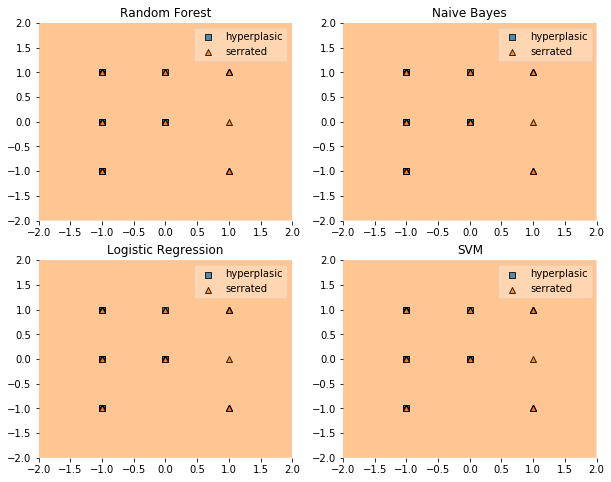

In [0]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Random Forest', 'Naive Bayes', 'Logistic Regression', 'SVM']



for clf, lab, grd in zip([clf2, clf3,clf1,  clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(XX, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=XX, y=y, clf=clf, legend=2)
    ax.legend(handles, 
          ['hyperplasic', 'serrated'], 
           framealpha=0.3, scatterpoints=1)
    plt.title(lab)

plt.show()

In [0]:
def make_meshgrid(x, y, h=.02):
  """Create a mesh of points to plot in

  Parameters
  ----------
  x: data to base x-axis meshgrid on
  y: data to base y-axis meshgrid on
  h: stepsize for meshgrid, optional

  Returns
  -------
  xx, yy : ndarray
  """
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
  """Plot the decision boundaries for a classifier.

  Parameters
  ----------
  ax: matplotlib axes object
  clf: a classifier
  xx: meshgrid ndarray
  yy: meshgrid ndarray
  params: dictionary of params to pass to contourf, optional
  """
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out


# import some data to play with
#iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
#X = iris.data[:, :2]
#y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

AttributeError: ignored

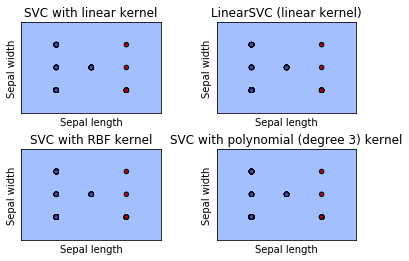

In [0]:
from sklearn import svm


# import some data to play with
#iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
#X = iris.data[:, :2]
#y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter

models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(XX, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
  plot_contours(ax, clf, xx, yy,
                cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xlabel('Sepal length')
  ax.set_ylabel('Sepal width')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)


In [0]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

#X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,                           random_state=1, n_clusters_per_class=1)
X = XWL_train.iloc[:,[0,1]].values#iris.data[:, [0,2]]
y = y_train#iris.target
    
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
datasets = [make_moons(noise=0.3, random_state=0)
            ]


figure = plt.figure(figsize=(30, 6))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    #X, y = ds
   

    
    
    X = StandardScaler().fit_transform(X)
    #X_train, X_test, y_train, y_test =         train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

NameError: ignored

In [0]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
#iris = datasets.load_iris()
# = iris.data[:, [0, 2]]
#y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=6)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(XX, y)
clf2.fit(XX, y)
clf3.fit(XX, y)
eclf.fit(XX, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=8)', 'KNN (k=6)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

NameError: ignored

In [0]:
X.shape, y.shape

((239, 2), (239,))

In [0]:
#X_train = pd.concat([XWL_train.T, XNBI_train.T]).T
#X_train.head()

In [0]:
!pip install xgboost

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier#, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    #X = iris.data[:, pair]
#y = iris.target


    #X = XWL_train.iloc[:,pair].values#iris.data[:, [0,2]]
    #y = y_train#iris.target
    
    # Train
    clf = DecisionTreeClassifier().fit(XX, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
#clf = DecisionTreeClassifier().fit(DATA, y)
#plot_tree(clf, filled=True)
model = XGBClassifier()
model.fit(DATA, y)
# plot single tree
plot_tree(model)
plt.show()


NameError: ignored

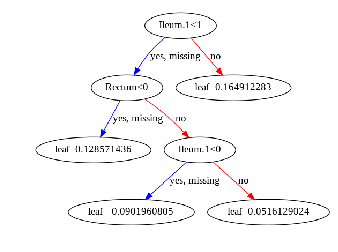

In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
# load data
#dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
#X = dataset[:,0:8]
#y = dataset[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(DATA, y)
# plot single tree
plot_tree(model)
plt.show()

https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

https://www.kaggle.com/shahp7575/red-wines-eda-classification

In [0]:
DATA[:,[0, 1]]

TypeError: ignored

https://www.kaggle.com/muammerhuseyinoglu/prediction-of-wine-quality
https://www.kaggle.com/fengdanye/machine-learning-3-logistic-and-softmax-regression

In [0]:
Feature_names=np.array(TRAIN_data.columns)

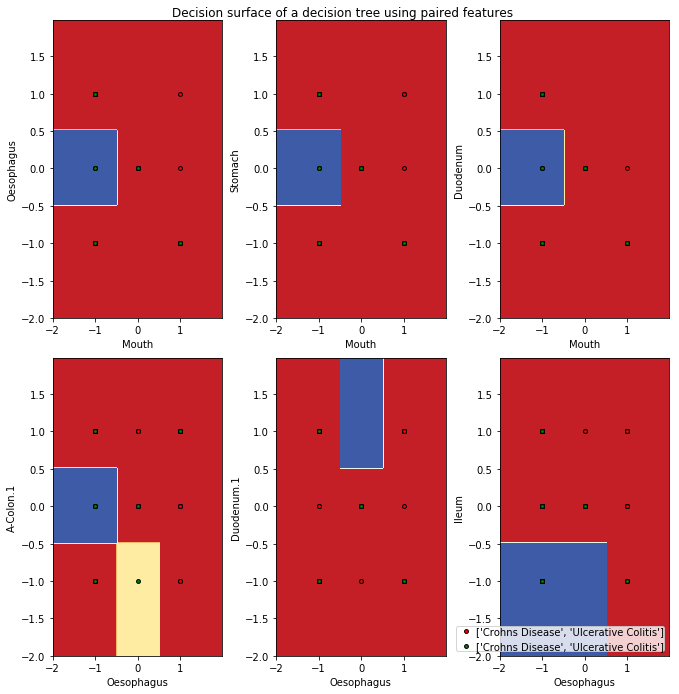

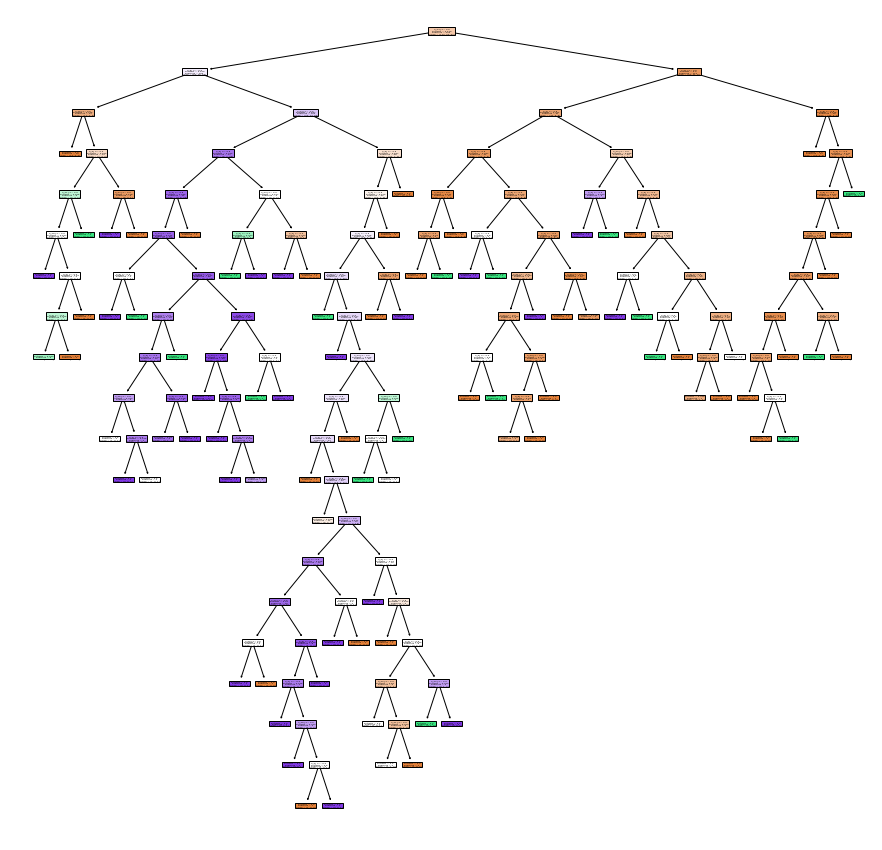

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 2
plot_colors = "rgb"
plot_step = 0.02

# Load data

plt.figure(figsize=(10, 10))

for pairidx, pair in enumerate([[1, 2], [1, 3], [1, 4],
                                [2, 16], [2, 14], [2, 5]]):
    # We only take the two corresponding features
    X = TRAIN_data.iloc[:,pair].values
    #y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(Feature_names[pair[0]])
    plt.ylabel(Feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=['Crohns Disease', 'Ulcerative Colitis'],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(15,15))

clf = DecisionTreeClassifier().fit(DATA, y)
plot_tree(clf, filled=True)
plt.show()

http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

Decision regions with more than two training features

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


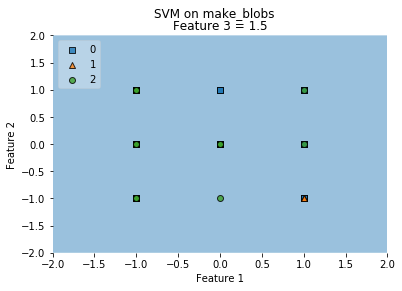

In [0]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
#X, y = datasets.make_blobs(n_samples=600, n_features=3,                           centers=[[2, 2, -2],[-2, -2, 2]],                           cluster_std=[2, 2], random_state=2)

# Training a classifier
svm = SVC(gamma='auto')
svm.fit(X, y)

# Plotting decision regions
fig, ax = plt.subplots()
# Decision region for feature 3 = 1.5
value = 1.5
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 0.75
plot_decision_regions(X, y, clf=svm,
                      filler_feature_values={2: value},
                      filler_feature_ranges={2: width},
                      legend=2, ax=ax)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
fig.suptitle('SVM on make_blobs')
plt.show()

ValueError: ignored

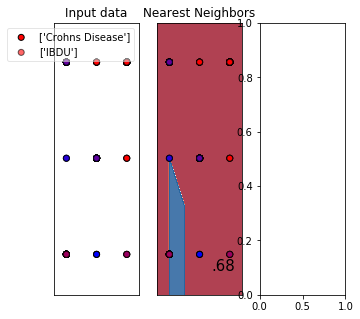

In [0]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

#X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,                    random_state=1, n_clusters_per_class=1)
pair=[5,15]
X=TRAIN_data.iloc[:,pair].values

rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape[0])
linearly_separable = (X, y)




figure = plt.figure(figsize=(20,5))
i = 1
# iterate over datasets

# preprocess dataset, split into training and test part
#X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
color=['red','green','blue']
c_train=['red' if nn==0 else 'blue' for nn in y_train]
c_test=['red' if nn==0 else 'blue' for nn in y_test]

ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=c_train, cmap=cm_bright, edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=c_test, cmap=cm_bright, alpha=0.6,label=['Crohns Disease','IBDU', 'Ulcerative Colitis'], edgecolors='k')

handles, labels = ax.get_legend_handles_labels()
ax.legend([['Crohns Disease'],['IBDU'], ['Ulcerative Colitis']], framealpha=0.5, scatterpoints=1)


###plt.scatter(X[idx, 0], X[idx, 1], c=color, label=['Crohns Disease', 'Ulcerative Colitis'], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)####### if ds_cnt==0 :
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

In [0]:
X.shape

239

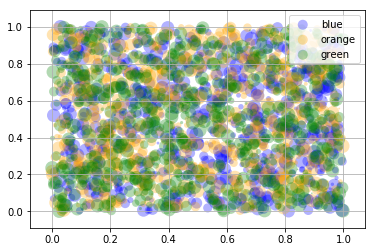

In [0]:
import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
for color in ['blue', 'orange', 'green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

https://pythonprogramming.net/cnn-tensorflow-convolutional-nerual-network-machine-learning-tutorial/

https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

https://pythonprogramming.net/cnn-tensorflow-convolutional-nerual-network-machine-learning-tutorial/



